In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [3]:
dataframe=pd.read_csv('../data/combine.csv')
dataframe.head()

C:\Users\User\AppData\Local\Temp\ipykernel_3260\278630435.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe=pd.read_csv('../data/combine.csv')


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [4]:
df=dataframe.sample(n=854321,replace=True)
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
387003,9502,43.0,1.0,1.0,0.0,6.0,0.0,0.0,0.000000,0.000000,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PortScan
1719374,80,990.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS Hulk
1838645,80,13000.0,3.0,1.0,18.0,0.0,6.0,6.0,6.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS Hulk
310667,53,267.0,2.0,2.0,76.0,606.0,38.0,38.0,38.000000,0.000000,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
922411,80,68778.0,3.0,4.0,482.0,361.0,476.0,0.0,160.666667,273.103155,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [5]:
df.shape

(854321, 79)

In [6]:
print('Label distribution:')
df[' Label'].value_counts()

Label distribution:


 Label
BENIGN              644733
DoS Hulk             89275
PortScan             61819
DDoS                 49411
DoS GoldenEye         3993
DoS slowloris         2172
DoS Slowhttptest      2148
Bot                    755
Infiltration            11
Heartbleed               3
Name: count, dtype: int64

In [7]:
df.isna().any()[lambda x:x]

 Flow Duration                  True
 Total Fwd Packets              True
 Total Backward Packets         True
Total Length of Fwd Packets     True
 Total Length of Bwd Packets    True
                                ... 
Idle Mean                       True
 Idle Std                       True
 Idle Max                       True
 Idle Min                       True
 Label                          True
Length: 78, dtype: bool

In [8]:
del df['Flow Bytes/s']

In [9]:
del df[' Flow Packets/s']

In [10]:
df.shape

(854321, 77)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 854321 entries, 387003 to 1546818
Data columns (total 77 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             854321 non-null  object 
 1    Flow Duration                854320 non-null  float64
 2    Total Fwd Packets            854320 non-null  float64
 3    Total Backward Packets       854320 non-null  float64
 4   Total Length of Fwd Packets   854320 non-null  float64
 5    Total Length of Bwd Packets  854320 non-null  float64
 6    Fwd Packet Length Max        854320 non-null  float64
 7    Fwd Packet Length Min        854320 non-null  float64
 8    Fwd Packet Length Mean       854320 non-null  float64
 9    Fwd Packet Length Std        854320 non-null  float64
 10  Bwd Packet Length Max         854320 non-null  float64
 11   Bwd Packet Length Min        854320 non-null  float64
 12   Bwd Packet Length Mean       854320 non-nu

In [12]:
df.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,8.543200e+05,854320.000000,854320.000000,8.543200e+05,8.543200e+05,854320.000000,854320.000000,854320.000000,854320.000000,854320.000000,...,854320.000000,8.543200e+05,8.543200e+05,8.543200e+05,8.543200e+05,8.543200e+05,8.543200e+05,8.543200e+05,8.543200e+05,8.543200e+05
mean,1.577170e+07,8.998193,9.810920,5.525049e+02,1.571400e+04,218.821845,17.991202,61.181300,74.878384,994.669952,...,6.176528,-7.593414e+02,8.435607e+04,3.929471e+04,1.500329e+05,6.154055e+04,9.690203e+06,6.077321e+05,1.014824e+07,9.222786e+06
std,3.448248e+07,742.494956,975.959518,6.260457e+03,2.273961e+06,776.306168,64.975739,203.877494,310.201523,2134.334935,...,709.706891,2.566959e+05,6.733013e+05,4.062585e+05,1.038119e+06,5.973663e+05,2.569758e+07,5.125953e+06,2.650743e+07,2.542188e+07
min,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-8.388531e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.350000e+02,2.000000,1.000000,6.000000e+00,6.000000e+00,6.000000,0.000000,6.000000,0.000000,6.000000,...,0.000000,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.129800e+04,2.000000,2.000000,6.000000e+01,1.200000e+02,36.000000,2.000000,33.000000,0.000000,77.000000,...,1.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.319172e+06,5.000000,5.000000,2.640000e+02,6.420000e+02,121.000000,34.000000,50.000000,27.135463,374.000000,...,2.000000,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+08,218658.000000,291260.000000,1.827335e+06,6.410014e+08,23360.000000,2325.000000,5939.285714,6692.644993,19530.000000,...,207501.000000,9.300000e+01,1.050000e+08,7.050000e+07,1.050000e+08,1.050000e+08,1.200000e+08,7.514502e+07,1.200000e+08,1.200000e+08


In [13]:
moddf= df.dropna()
moddf.shape

(854320, 77)

In [14]:
moddf[' Label'].value_counts()

 Label
BENIGN              644733
DoS Hulk             89275
PortScan             61819
DDoS                 49411
DoS GoldenEye         3993
DoS slowloris         2172
DoS Slowhttptest      2148
Bot                    755
Infiltration            11
Heartbleed               3
Name: count, dtype: int64

In [15]:
def map_to_5_classes(label):
    if label == 'BENIGN':
        return 'Normal'
    elif label in ['DoS Hulk', 'DoS GoldenEye', 'DoS slowloris', 'DoS Slowhttptest', 'DDoS']:
        return 'DoS'
    elif label == 'PortScan':
        return 'Probe'
    elif label in ['Bot', 'Infiltration']:
        return 'R2L'
    elif label == 'Heartbleed':
        return 'U2R'

moddf[' Label'] = moddf[' Label'].apply(map_to_5_classes)


C:\Users\User\AppData\Local\Temp\ipykernel_3260\493741917.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moddf[' Label'] = moddf[' Label'].apply(map_to_5_classes)


In [16]:
moddf[' Label'].value_counts()

 Label
Normal    644733
DoS       146999
Probe      61819
R2L          766
U2R            3
Name: count, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(moddf,test_size = 0.20)
print(df_train.shape)
print(df_test.shape)

(683456, 77)
(170864, 77)


In [18]:
print('Label distribution Training set:')
print(df_train[' Label'].value_counts())
print()
print('Label distribution Test set:')
print(df_test[' Label'].value_counts())

Label distribution Training set:
 Label
Normal    515884
DoS       117522
Probe      49455
R2L          592
U2R            3
Name: count, dtype: int64

Label distribution Test set:
 Label
Normal    128849
DoS        29477
Probe      12364
R2L          174
Name: count, dtype: int64


In [19]:
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X_train = df_train.drop(' Label', axis=1)
y_train = df_train[' Label']
X_test = df_test.drop(' Label', axis=1)
y_test = df_test[' Label']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN

In [21]:
# --- KNN Model ---
print("\n--- K-Nearest Neighbors (KNN) Model ---")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)


--- K-Nearest Neighbors (KNN) Model ---


In [22]:
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))



KNN Classification Report:
              precision    recall  f1-score   support

         DoS       1.00      1.00      1.00     29477
      Normal       1.00      0.99      1.00    128849
       Probe       0.94      0.97      0.96     12364
         R2L       0.67      0.56      0.61       174

    accuracy                           0.99    170864
   macro avg       0.90      0.88      0.89    170864
weighted avg       0.99      0.99      0.99    170864



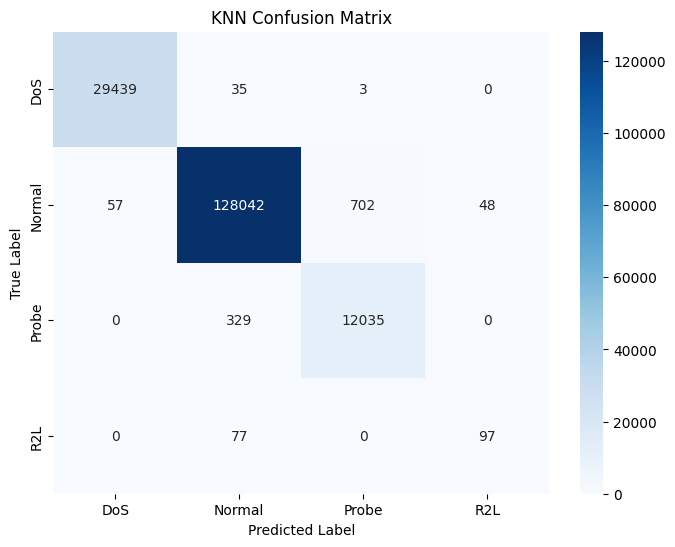

In [23]:

# Confusion Matrix Visualization for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [24]:
# --- Prepare data for RNN and LSTM ---
# Convert string labels to numerical labels
label_mapping = {label: i for i, label in enumerate(np.unique(y_train))}
y_train_encoded = y_train.map(label_mapping)
y_test_encoded = y_test.map(label_mapping)

# Reshape data for RNN and LSTM (requires input_shape (n_samples, timesteps, features))
# Assuming each sample is a sequence of one timestep with multiple features
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

num_classes = len(np.unique(y_train))

In [25]:
# --- RNN Model ---
print("\n--- Recurrent Neural Network (RNN) Model ---")
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
rnn_model.add(Dense(units=num_classes, activation='softmax'))

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train_reshaped, y_train_encoded, epochs=5, batch_size=64, validation_split=0.2)



--- Recurrent Neural Network (RNN) Model ---


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
8544/8544 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9381 - loss: 0.1763 - val_accuracy: 0.9676 - val_loss: 0.0739
Epoch 2/5
8544/8544 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9702 - loss: 0.0696 - val_accuracy: 0.9772 - val_loss: 0.0585
Epoch 3/5
8544/8544 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9745 - loss: 0.0577 - val_accuracy: 0.9768 - val_loss: 0.0552
Epoch 4/5
8544/8544 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9773 - loss: 0.0528 - val_accuracy: 0.9746 - val_loss: 0.0522
Epoch 5/5
8544/8544 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.9787 - loss: 0.0496 - val_accuracy: 0.9832 - val_loss: 0.0452


In [26]:


# Evaluate RNN Model
loss_rnn, accuracy_rnn = rnn_model.evaluate(X_test_reshaped, y_test_encoded)
print(f"\nRNN Test Loss: {loss_rnn:.4f}")
print(f"RNN Test Accuracy: {accuracy_rnn:.4f}")

y_pred_rnn_probs = rnn_model.predict(X_test_reshaped)
y_pred_rnn = np.argmax(y_pred_rnn_probs, axis=1)

5340/5340 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9828 - loss: 0.0454

RNN Test Loss: 0.0449
RNN Test Accuracy: 0.9830
5340/5340 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


In [27]:
# Convert predicted numerical labels back to original labels for classification report
y_pred_rnn_decoded = pd.Series(y_pred_rnn).map({v: k for k, v in label_mapping.items()})
print("\nRNN Classification Report:")
print(classification_report(y_test, y_pred_rnn_decoded))


RNN Classification Report:
              precision    recall  f1-score   support

         DoS       0.97      0.99      0.98     29477
      Normal       0.99      0.99      0.99    128849
       Probe       0.91      0.95      0.93     12364
         R2L       0.94      0.34      0.50       174

    accuracy                           0.98    170864
   macro avg       0.95      0.82      0.85    170864
weighted avg       0.98      0.98      0.98    170864



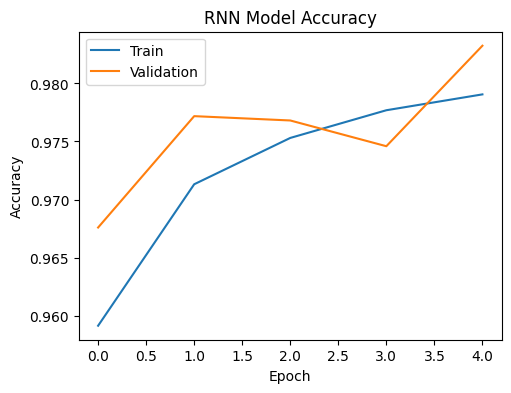

In [28]:

# Plot RNN Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['accuracy'])
plt.plot(rnn_history.history['val_accuracy'])
plt.title('RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

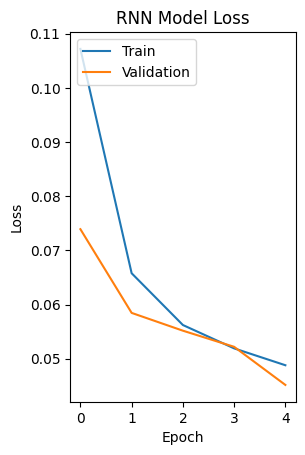

In [29]:
plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['loss'])
plt.plot(rnn_history.history['val_loss'])
plt.title('RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

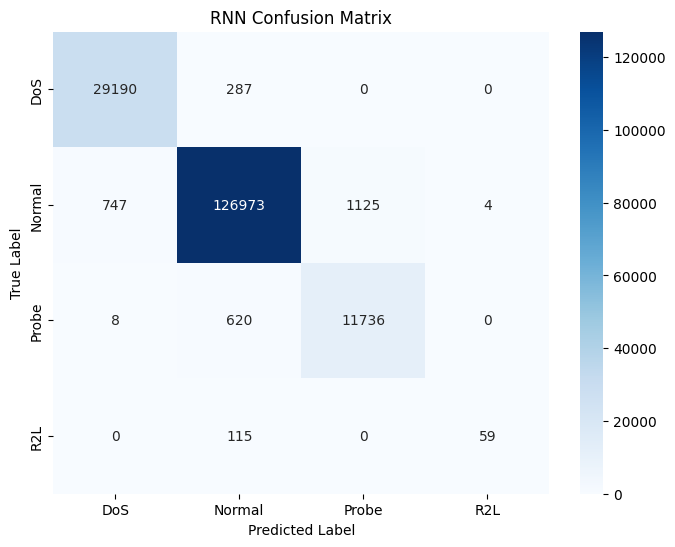

In [30]:


# Confusion Matrix Visualization for RNN
cm_rnn = confusion_matrix(y_test, y_pred_rnn_decoded)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('RNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [31]:
# --- LSTM Model ---
print("\n--- Long Short-Term Memory (LSTM) Model ---")
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm_model.add(Dense(units=num_classes, activation='softmax'))

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train_reshaped, y_train_encoded, epochs=5, batch_size=64, validation_split=0.2)


--- Long Short-Term Memory (LSTM) Model ---


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
8544/8544 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9460 - loss: 0.1595 - val_accuracy: 0.9709 - val_loss: 0.0644
Epoch 2/5
8544/8544 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9735 - loss: 0.0590 - val_accuracy: 0.9721 - val_loss: 0.0561
Epoch 3/5
8544/8544 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9767 - loss: 0.0532 - val_accuracy: 0.9820 - val_loss: 0.0488
Epoch 4/5
8544/8544 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9782 - loss: 0.0501 - val_accuracy: 0.9809 - val_loss: 0.0473
Epoch 5/5
8544/8544 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9795 - loss: 0.0470 - val_accuracy: 0.9720 - val_loss: 0.0591


In [32]:

# Evaluate LSTM Model
loss_lstm, accuracy_lstm = lstm_model.evaluate(X_test_reshaped, y_test_encoded)
print(f"\nLSTM Test Loss: {loss_lstm:.4f}")
print(f"LSTM Test Accuracy: {accuracy_lstm:.4f}")

y_pred_lstm_probs = lstm_model.predict(X_test_reshaped)
y_pred_lstm = np.argmax(y_pred_lstm_probs, axis=1)


5340/5340 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.9719 - loss: 0.0601

LSTM Test Loss: 0.0608
LSTM Test Accuracy: 0.9714
5340/5340 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


In [33]:

# Convert predicted numerical labels back to original labels for classification report
y_pred_lstm_decoded = pd.Series(y_pred_lstm).map({v: k for k, v in label_mapping.items()})
print("\nLSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm_decoded))


LSTM Classification Report:
              precision    recall  f1-score   support

         DoS       1.00      0.92      0.95     29477
      Normal       0.97      0.99      0.98    128849
       Probe       0.95      0.87      0.91     12364
         R2L       0.97      0.33      0.49       174

    accuracy                           0.97    170864
   macro avg       0.97      0.78      0.83    170864
weighted avg       0.97      0.97      0.97    170864



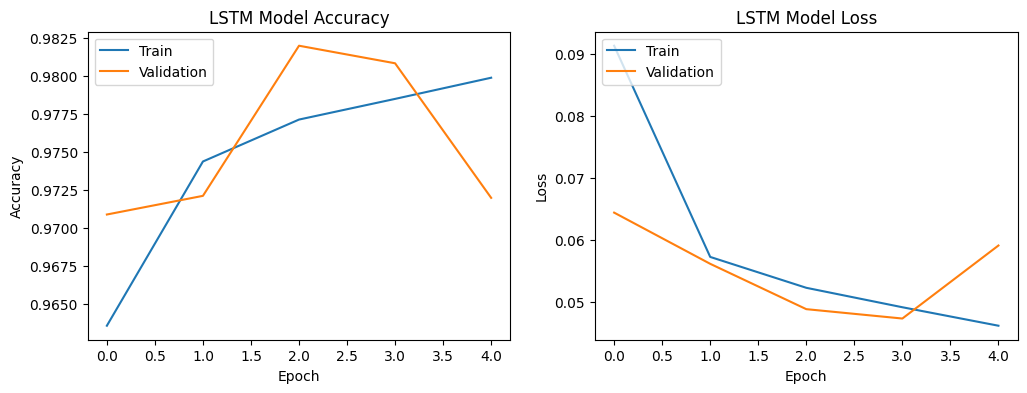

In [34]:
# Plot LSTM Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


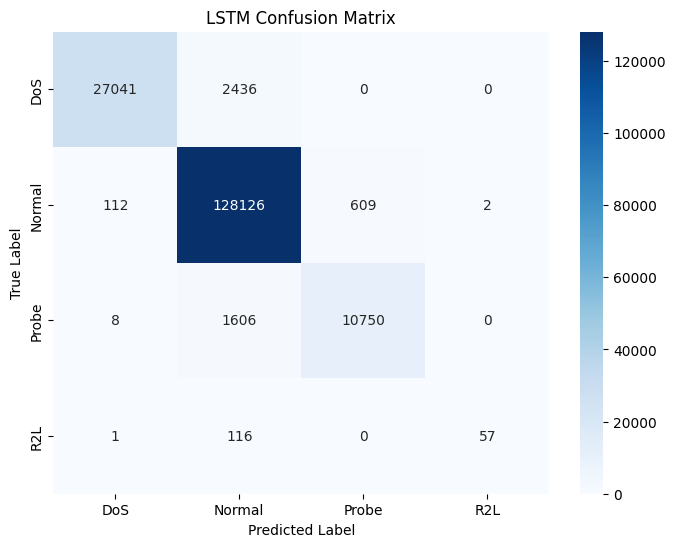

In [35]:

# Confusion Matrix Visualization for LSTM
cm_lstm = confusion_matrix(y_test, y_pred_lstm_decoded)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()